In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [7]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

KeyError: "['PID' 'Unnamed: 0.1'] not found in axis"

In [9]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [10]:
cb = CatBoostRegressor(random_state=1, verbose=False)

In [11]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [12]:
cat = evaluate_model(cb, X, y)

In [13]:
cat

,fit_time,score_time,test_score
0,5.713901,0.009413,0.926950
1,8.264534,0.019251,0.898789
2,5.868758,0.004656,0.936517
3,7.466745,0.026494,0.929022
4,5.875408,0.006579,0.950638
5,6.617177,0.007023,0.936688
6,5.678174,0.009410,0.942846
7,7.770540,0.024615,0.926769
8,4.587372,0.005032,0.945508
9,5.761831,0.004085,0.884738


In [14]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [15]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [16]:
ordinald1 = pd.read_csv('OrdinalDrop1.csv')
ordinald1.shape

(2579, 83)

In [17]:
ordinald1 = ordinald1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald1.shape

(2579, 80)

In [18]:
Xd1 = ordinald1.drop(['SalePrice'], axis=1)
yd1 = ordinald1.SalePrice

In [19]:
catd1 = evaluate_model(cb, Xd1, yd1)

In [20]:
catd1

,fit_time,score_time,test_score
0,9.528357,0.018506,0.931308
1,9.483940,0.020307,0.946897
2,5.167893,0.003629,0.946280
3,9.663083,0.019703,0.911824
4,9.375381,0.019452,0.949900
5,9.483261,0.022282,0.933133
6,4.499287,0.004470,0.929582
7,9.349164,0.025124,0.926053
8,4.241874,0.005886,0.950737
9,4.832208,0.004222,0.939564


In [21]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [22]:
catd1

,catd1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [27]:
ordinalIF1 = pd.read_csv('OrdinalDropIF.csv')
ordinalIF1.shape

(2579, 83)

In [28]:
ordinalIF1 = ordinalIF1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinalIF1.shape

(2579, 80)

In [29]:
XIF1 = ordinalIF1.drop(['SalePrice'], axis=1)
yIF1 = ordinalIF1.SalePrice

In [30]:
catIF1 = evaluate_model(cb, XIF1, yIF1)

In [31]:
catIF1

,fit_time,score_time,test_score
0,8.334855,0.021057,0.931308
1,6.388234,0.006625,0.946897
2,6.266564,0.005839,0.946280
3,6.099173,0.008737,0.911824
4,5.964703,0.010399,0.949900
5,7.082077,0.007909,0.933133
6,6.061234,0.006031,0.929582
7,5.955547,0.007219,0.926053
8,5.622257,0.005752,0.950737
9,5.691629,0.003632,0.939564


In [32]:
catIF1 = catIF1[['test_score']].rename(columns={'test_score':'catIF1_score'})

In [33]:
catIF1

,catIF1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [34]:
combo = pd.concat([cat, catd1, catIF1], axis=1)

In [35]:
combo

,cat_score,catd1_score,catIF1_score
0,0.926950,0.931308,0.931308
1,0.898789,0.946897,0.946897
2,0.936517,0.946280,0.946280
3,0.929022,0.911824,0.911824
4,0.950638,0.949900,0.949900
5,0.936688,0.933133,0.933133
6,0.942846,0.929582,0.929582
7,0.926769,0.926053,0.926053
8,0.945508,0.950737,0.950737
9,0.884738,0.939564,0.939564


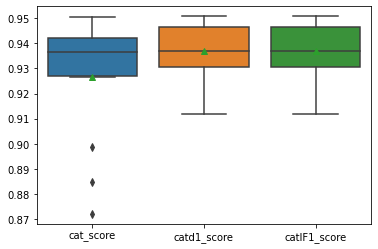

In [36]:
sns.boxplot(data=combo, showmeans=True);

In [37]:
combo.describe()

,cat_score,catd1_score,catIF1_score
count,15.000000,15.000000,15.000000
mean,0.926683,0.936878,0.936878
std,0.023191,0.011131,0.011131
min,0.872051,0.911824,0.911824
25%,0.926860,0.930445,0.930445
50%,0.936517,0.936986,0.936986
75%,0.942064,0.946589,0.946589
max,0.950638,0.950737,0.950737
